In [7]:
# Importación módulos
import sys
import numpy as np
np.set_printoptions(threshold=10000)
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
ruta =  '../imgpack/Monobanda/2_Corsica.jpg'
img = cv.imread(ruta,cv.IMREAD_GRAYSCALE) #Transformamos nuestra imagen a escala de grises

In [13]:
def corte(img,porc):
    #Funciones auxiliares para la realización de esta función
    
    #Función histograma
    def histograma(img):
        resimg = img.copy()
        f,c = resimg.shape
        hst = [0]*256
        for x in range(f):
            for y in range(c):
                pixel=resimg[x,y]
                hst[pixel]+=1
        return hst

    # Función expansión lineal
    def expan(img,cmin,cmax):
    # Copiar imagen
        resimg = img.copy()
        fila,columna = img.shape
    
        for i in range(fila):
            for j in range(columna):
                pixel = resimg[i,j]
                if pixel <= cmin:
                    resimg[i,j] = 0
                elif pixel >= cmax:
                    resimg[i,j] = 255
                else:
                    resimg[i,j] = np.round(0 + ((pixel-cmin)/(cmax-cmin))*(255-0))
        return resimg

    #1. Calcular el histograma de la imagen recibida como entrada
    hst = histograma(img) 
    
    #2. Obtener el n ́umero total de p ́ıxeles de la imagen de entrad
    num_pixeles = img.size # También puedes mutiplicar las componentes de img.shape
    
    # Calcular NDcmin y NDcmax
    cmin=0
    cmax= 0
    accmin = 0
    accmax = 0
    prop_afuera = porc*num_pixeles
    for i in range(256):
        if accmin>=prop_afuera:
            cmin = i
            break
        else:
            accmin+=hst[i]

    for j in range(255,-1,-1):
        if accmax>=prop_afuera:
            cmax = j
            break
        else:
            accmax+=hst[j]
    #print(cmin,cmax)
    res = expan(img,cmin,cmax)
    return res
    

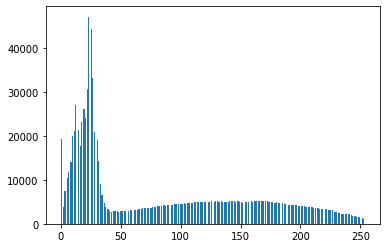

In [14]:
#Aplica el corte de colas
img_exp = corte(img,0.01)

# Dibuja histograma entre 0 y 254
plt.hist(img_exp.ravel(), 255,[0,254], width=1);plt.show()

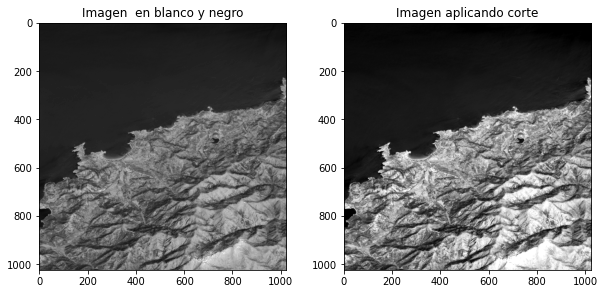

In [15]:
fig = plt.figure(figsize=(10, 10)) # Creamos nueva figura

#Mostramos la imagen como el histograma
fig.add_subplot(221)
plt.title('Imagen  en blanco y negro')
plt.imshow(img,cmap='gray')
fig.add_subplot(222)
plt.title('Imagen aplicando corte')
plt.imshow(img_exp,cmap='gray')
plt.show()